# Part 3: Comparing Classifiers 

In [12]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import StratifiedKFold
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt
import seaborn as sns



%matplotlib inline

In [2]:
Xtrain = pd.read_csv('./../data/xtrain.csv')
Xtest = pd.read_csv('./../data/xtest.csv')
ytest = pd.read_csv('./../data/ytest.csv')
ytrain = pd.read_csv('./../data/ytrain.csv')

In [4]:
names = ["Decision Tree","Naive Bayes","Logistic Regression"]

classifiers = [
    DecisionTreeClassifier(),
    GaussianNB(), 
    LogisticRegression(fit_intercept=True)]



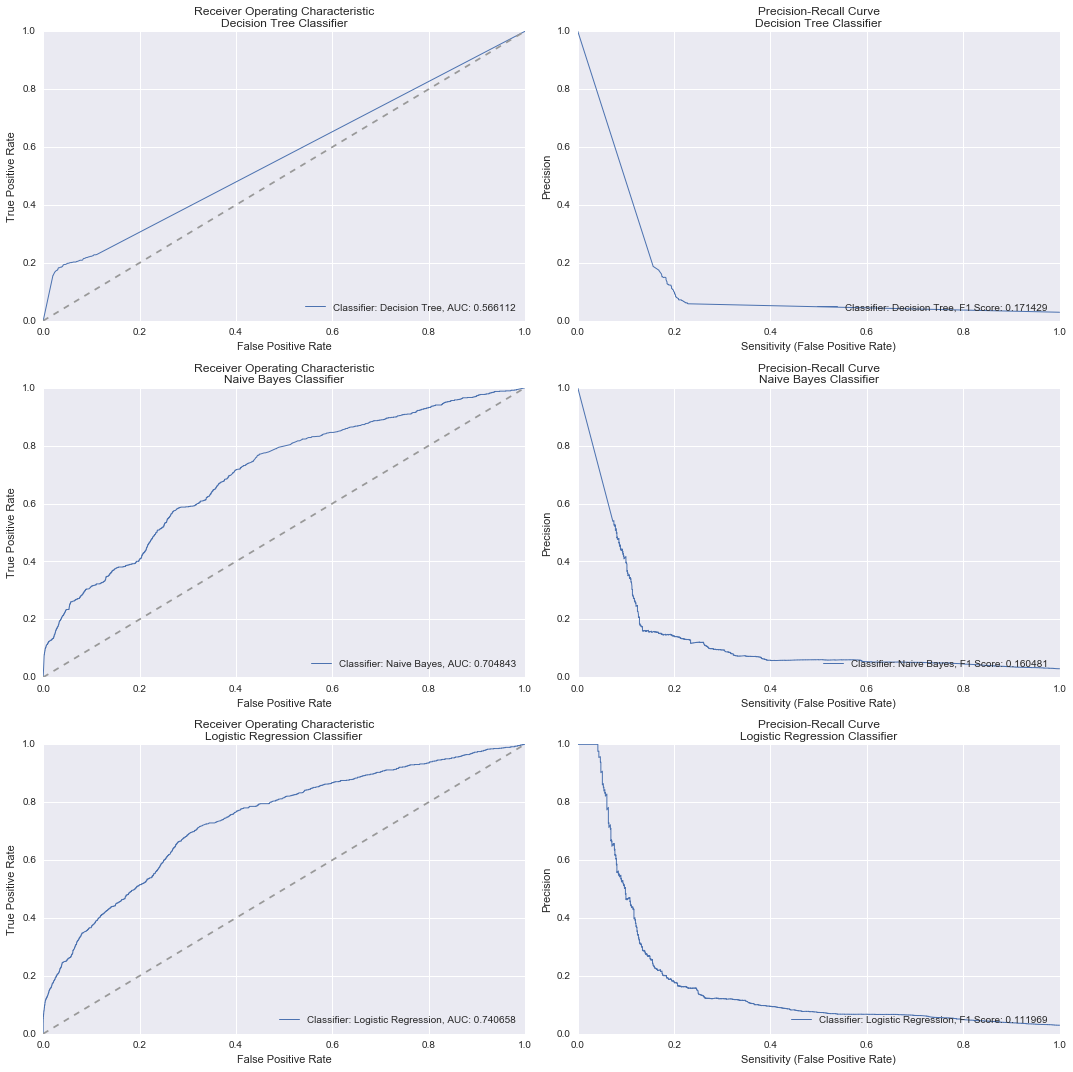

In [11]:
fig, ((ax1, ax2),(ax3, ax4),(ax5,ax6)) = plt.subplots(nrows=3, ncols=2, figsize=(15,15))
axes = ((ax1, ax2),(ax3, ax4),(ax5,ax6))

for ax, name, clf in zip(axes, names, classifiers):
        clf.fit(Xtrain, np.array(ytrain).ravel())
        #score = clf.score(Xtest, ytest)
        probas_ = clf.predict_proba(Xtest)
        ypred = (probas_[:,1] >= 0.5).astype(int)
        
        fpr, tpr, thresholds = roc_curve(ytest, probas_[:, 1], pos_label=1)
                                        #sample_weight=np.where(ytrain.iloc[cval]==1, float(len(ytrain.iloc[cval]))/float((ytrain.iloc[cval]==1).sum()), 1.0).ravel())
        precision, recall, thresholds = precision_recall_curve(ytest, probas_[:,1], pos_label=1)
                                                               #sample_weight=np.where(ytrain.iloc[cval]==1, float(len(ytrain.iloc[cval]))/float((ytrain.iloc[cval]==1).sum()), 1.0).ravel()) 
        f1 = f1_score(ytest, ypred, pos_label=1)

        #mean_tpr += interp(mean_fpr, fpr, tpr)
        #mean_tpr[0] = 0.0
        roc_auc = auc(fpr, tpr)
        ax[0].plot(fpr, tpr, lw=1, label='Classifier: %s, AUC: %f' % (name, roc_auc))
        ax[0].legend(loc="lower right")
        ax[0].plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Random Chance')
        ax[0].set_xlabel('False Positive Rate')
        ax[0].set_ylabel('True Positive Rate')
        ax[0].set_title('Receiver Operating Characteristic\n%s Classifier' % (name))
        
        ax[1].plot(recall, precision, lw=1, label='Classifier: %s, F1 Score: %f ' % (name, f1))
        ax[1].set_xlabel('Sensitivity (False Positive Rate)')
        ax[1].set_ylabel('Precision')
        ax[1].set_title('Precision-Recall Curve\n%s Classifier' % (name))
        ax[1].legend(loc="lower right")

plt.tight_layout()

Generate Decision Tree Image

In [53]:
from sklearn.externals.six import StringIO
import pydot 
from IPython.display import Image  
import os

clf1 = DecisionTreeClassifier(max_depth=3)
clf1.fit(Xtrain, ytrain)

with open("./../visuals/dt_md3.dot", 'w') as f:
    export_graphviz(clf1, out_file=f,  
                         feature_names=Xtrain.columns,
                         class_names=['Not Fraud','Fraud'],  
                         filled=True, rounded=True, node_ids=True,  
                         special_characters=True)  
#graph = pydot.graph_from_dot_data(dot_data.getvalue())  

In [50]:
#os.unlink('tree.dot')
dot_data = StringIO('tree.dot')
#graph = pydot.graph_from_dot_data(dot_data.getvalue())
#dotfile = StringIO()
export_graphviz(clf1, out_file=dot_data)
pydot.graph_from_dot_data(dot_data.getvalue()).write_png("dtree2.png")

AttributeError: 'list' object has no attribute 'write_png'